# upload dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("/content/Daftar Data Perusahaan Menengah ke Atas dengan lokasinya Tahun 2024 (Nganjuk) (1).xlsx", engine='openpyxl')

Saving Daftar Data Perusahaan Menengah ke Atas dengan lokasinya Tahun 2024 (Nganjuk).xlsx to Daftar Data Perusahaan Menengah ke Atas dengan lokasinya Tahun 2024 (Nganjuk) (1).xlsx


#DATA UNDERSTANDING

In [ ]:
print("===== 1. INFORMASI STRUKTUR DATASET =====")
df.info()

===== 1. INFORMASI STRUKTUR DATASET =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   KODE WILAYAH                 50 non-null     object
 1   PERUSAHAAN                   50 non-null     object
 2   SEKTOR                       50 non-null     object
 3   JML TK                       50 non-null     int64 
 4   ALAMAT                       50 non-null     object
 5   MAPS                         50 non-null     object
 6   DISABILITAS                  50 non-null     int64 
 7   JUMLAH BPJS KETENAGAKERJAAN  50 non-null     int64 
 8   JUMLAH BPJS KESEHATAN        50 non-null     int64 
 9   PP/PKB                       12 non-null     object
 10  LKS BIPARTIT                 14 non-null     object
dtypes: int64(4), object(7)
memory usage: 4.4+ KB


In [ ]:
print("\n===== 2. STATISTIK DESKRIPTIF =====")
display(df.describe())


===== 2. STATISTIK DESKRIPTIF =====


,JML TK,DISABILITAS,JUMLAH BPJS KETENAGAKERJAAN,JUMLAH BPJS KESEHATAN
count,50.000000,50.000000,50.000000,50.000000
mean,384.400000,0.480000,283.340000,0.980000
std,685.837221,1.034901,679.712443,3.040475
min,47.000000,0.000000,0.000000,0.000000
25%,77.000000,0.000000,15.500000,0.000000
50%,178.500000,0.000000,72.000000,0.000000
75%,408.250000,0.000000,289.000000,0.000000
max,4615.000000,4.000000,4615.000000,19.000000


In [ ]:
print("\n===== 3. CEK MISSING VALUES =====")
print(df.isnull().sum())


===== 3. CEK MISSING VALUES =====
KODE WILAYAH                    0
PERUSAHAAN                      0
SEKTOR                          0
JML TK                          0
ALAMAT                          0
MAPS                            0
DISABILITAS                     0
JUMLAH BPJS KETENAGAKERJAAN     0
JUMLAH BPJS KESEHATAN           0
PP/PKB                         38
LKS BIPARTIT                   36
dtype: int64


In [ ]:
print("\n===== 4. CEK DUPLIKASI DATA =====")
print("Jumlah duplikasi:", df.duplicated().sum())


===== 4. CEK DUPLIKASI DATA =====
Jumlah duplikasi: 0


In [ ]:
print("\n===== 5. CEK TIPE DATA =====")
print(df.dtypes)


===== 5. CEK TIPE DATA =====
KODE WILAYAH                   object
PERUSAHAAN                     object
SEKTOR                         object
JML TK                          int64
ALAMAT                         object
MAPS                           object
DISABILITAS                     int64
JUMLAH BPJS KETENAGAKERJAAN     int64
JUMLAH BPJS KESEHATAN           int64
PP/PKB                         object
LKS BIPARTIT                   object
dtype: object


In [ ]:
print("\n===== 6. MELIHAT DISTRIBUSI SETIAP KOLOM =====")
display(df.describe(include='all'))


===== 6. MELIHAT DISTRIBUSI SETIAP KOLOM =====


,KODE WILAYAH,PERUSAHAAN,SEKTOR,JML TK,ALAMAT,MAPS,DISABILITAS,JUMLAH BPJS KETENAGAKERJAAN,JUMLAH BPJS KESEHATAN,PP/PKB,LKS BIPARTIT
count,50,50,50,50.000000,50,50,50.000000,50.000000,50.000000,12,14
unique,15,50,37,NaN,49,48,NaN,NaN,NaN,1,1
top,35.18.13,"PT. Mahatma Agro, Rejoso",Perbankan,NaN,Nganjuk,-,NaN,NaN,NaN,√,√
freq,14,1,4,NaN,2,3,NaN,NaN,NaN,12,14
mean,NaN,NaN,NaN,384.400000,NaN,NaN,0.480000,283.340000,0.980000,NaN,NaN
std,NaN,NaN,NaN,685.837221,NaN,NaN,1.034901,679.712443,3.040475,NaN,NaN
min,NaN,NaN,NaN,47.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,77.000000,NaN,NaN,0.000000,15.500000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,178.500000,NaN,NaN,0.000000,72.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,408.250000,NaN,NaN,0.000000,289.000000,0.000000,NaN,NaN


In [ ]:
print("\n===== 7. MENAMPILKAN 10 DATA TERAKHIR =====")
display(df.tail(10))


===== 7. MENAMPILKAN 10 DATA TERAKHIR =====


,KODE WILAYAH,PERUSAHAAN,SEKTOR,JML TK,ALAMAT,MAPS,DISABILITAS,JUMLAH BPJS KETENAGAKERJAAN,JUMLAH BPJS KESEHATAN,PP/PKB,LKS BIPARTIT
40,35.18.10,PT. Arja Kayu Lapis,Industri KayuLapis,98,"Jl. Raya Surabaya - Madiun Jl. Raya Plimping, ...",https://www.google.com/maps/place/PT.+ARJA+KAY...,0,43,0,NaN,NaN
41,35.18.19,PT. Sinar Jaya Prima Perkasa,Industri Karung,100,"Jl. Lengkong - Jatikalen, Jegreg, Kec. Lengkon...",https://www.google.com/maps/place/Sinar+Jaya+P...,0,0,0,NaN,NaN
42,35.18.05,PR. Putra Masa Depan,Industri rokok,300,"Jl. Warujayeng - Nganjuk, Jegles, Plosoharjo, ...",https://www.google.com/maps/place/Pt+putra+mas...,0,8,0,NaN,NaN
43,35.18.06,CV. Risqi Lumintu Plywood,Industri Kayu,70,Dsn. Ngetrep RT.06 RW.02 Ds.Kurungrejo Kec.Pra...,-,0,0,0,NaN,NaN
44,35.18.13,Berkat Anugerahnya,Jasa Pengiriman Barang,53,Nganjuk,-,0,53,0,NaN,NaN
45,35.18.13,PT. Karya Bintang Mandiri,Jasa Outsourcing,277,Nganjuk,-,0,277,0,NaN,NaN
46,35.18.13,PT. Tsamaniya Amanah Mandiri,Retail,55,JL.PANGLIMA SUDIRMAN NO.142 Kabupaten Nganjuk,https://www.google.com/maps/place/Tsamaniya+Mi...,0,55,0,NaN,NaN
47,35.18.19,Trijaya Lestari Food,Pemborongan Ayam,114,"Prayungan, Kec. Lengkong, Kabupaten Nganjuk",https://www.google.com/maps/place/RPA+Lengkong...,0,99,0,NaN,NaN
48,35.18.03,Rimba Damai Sejahtera-Borongan,Industri Rokok,73,"9VH3+XV4, Bulu, Kec. Berbek, Kabupaten Nganjuk...",https://www.google.com/maps/place/PT.+RIMBA+DA...,0,73,0,NaN,NaN
49,35.18.17,PT. Mitra Mulia Makmur,Industri Tupperware,250,"Jl. Gondang-Lengkong, Sempayang, Jaan, Kec. Go...",https://www.google.com/maps/place/PT.+Mitramul...,0,0,0,NaN,NaN


# DATA CLEANING


In [ ]:
print("===== 1. CEK MISSING VALUES =====")
print(df.isnull().sum())

===== 1. CEK MISSING VALUES =====
KODE WILAYAH                    0
PERUSAHAAN                      0
SEKTOR                          0
JML TK                          0
ALAMAT                          0
MAPS                            0
DISABILITAS                     0
JUMLAH BPJS KETENAGAKERJAAN     0
JUMLAH BPJS KESEHATAN           0
PP/PKB                         38
LKS BIPARTIT                   36
dtype: int64


# MENANGANI MISSING VALUES

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values setelah cleaning:")
print(df.isnull().sum())


Missing values setelah cleaning:
KODE WILAYAH                   0
PERUSAHAAN                     0
SEKTOR                         0
JML TK                         0
ALAMAT                         0
MAPS                           0
DISABILITAS                    0
JUMLAH BPJS KETENAGAKERJAAN    0
JUMLAH BPJS KESEHATAN          0
PP/PKB                         0
LKS BIPARTIT                   0
dtype: int64


# MENGHAPUS DUPLIKASI

In [ ]:
duplicated_count = df.duplicated().sum()
print("\nJumlah data duplikasi sebelum dihapus:", duplicated_count)

df = df.drop_duplicates()

print("Jumlah data duplikasi setelah dihapus:", df.duplicated().sum())


Jumlah data duplikasi sebelum dihapus: 0
Jumlah data duplikasi setelah dihapus: 0


# VISUALISASI EDA


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## DISTRIBUSI SETIAP KOLOM NUMERIK

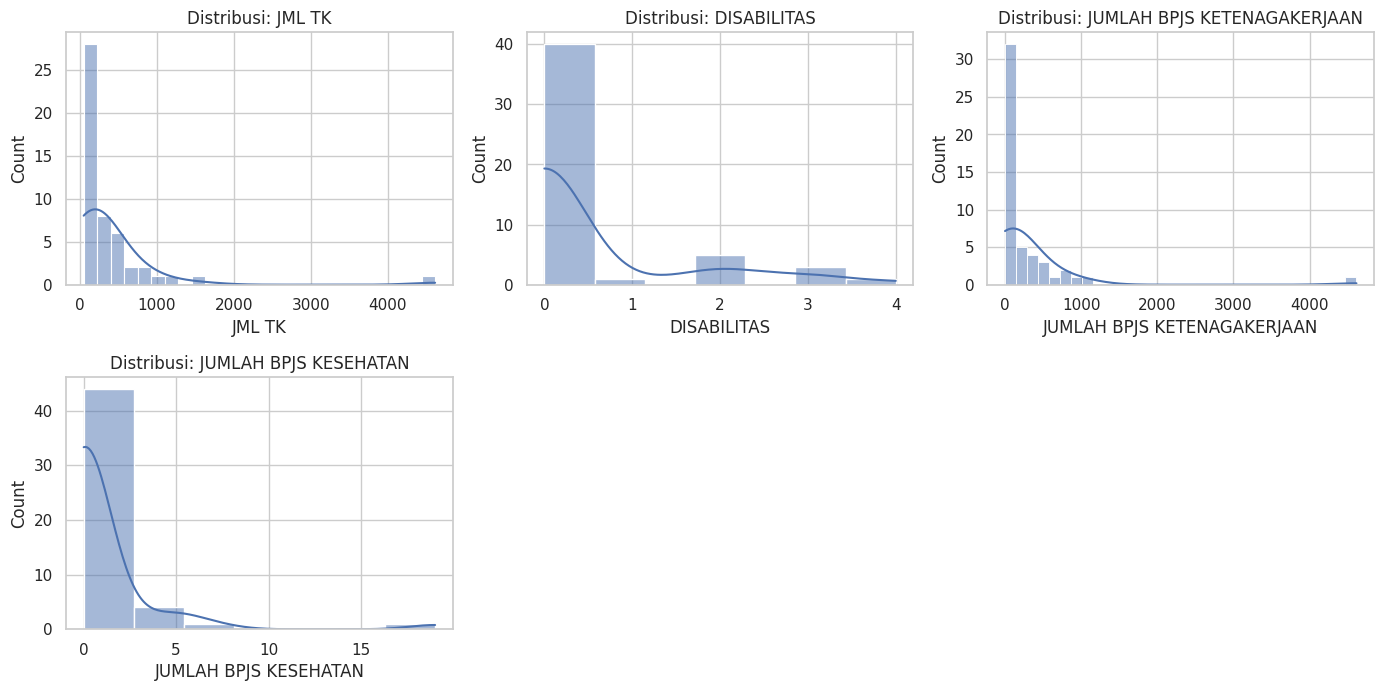

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi: {col}")
plt.tight_layout()
plt.show()

#BOX PLOT UNTUK MENDETEKSI OUTLIER

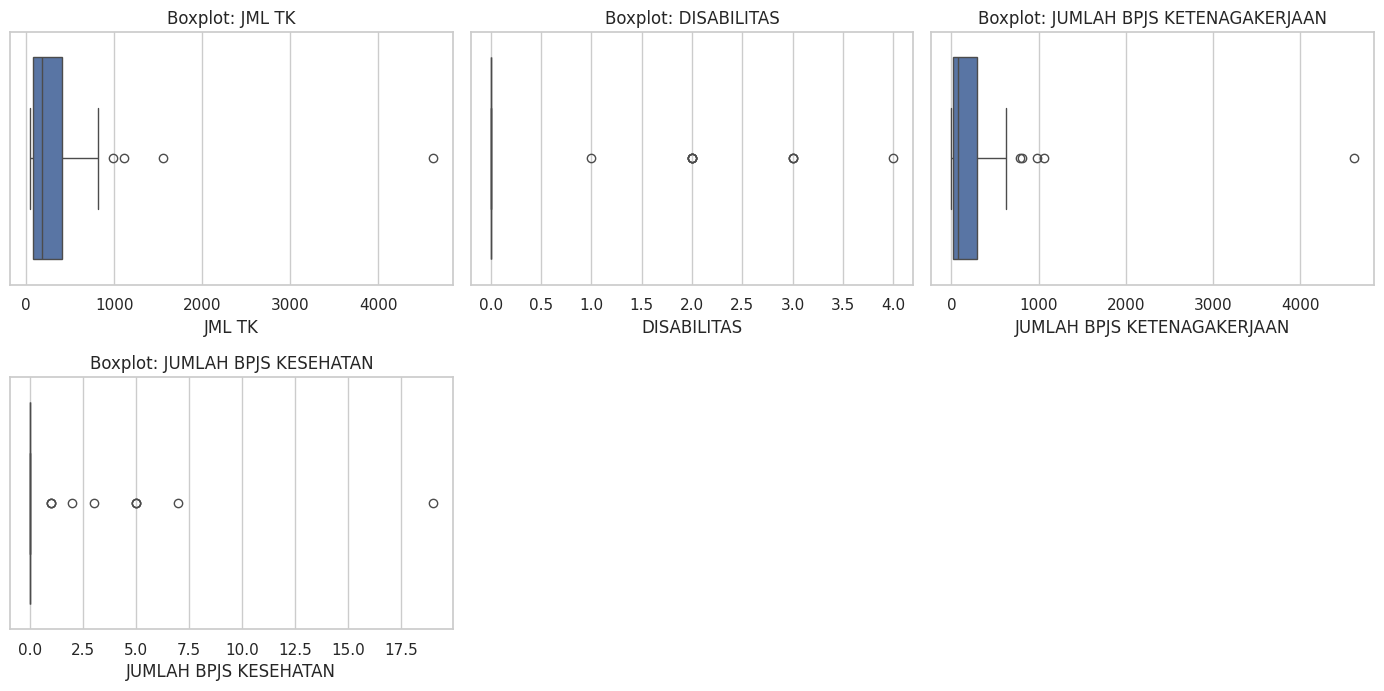

In [ ]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

# HEATMAP KORELASI

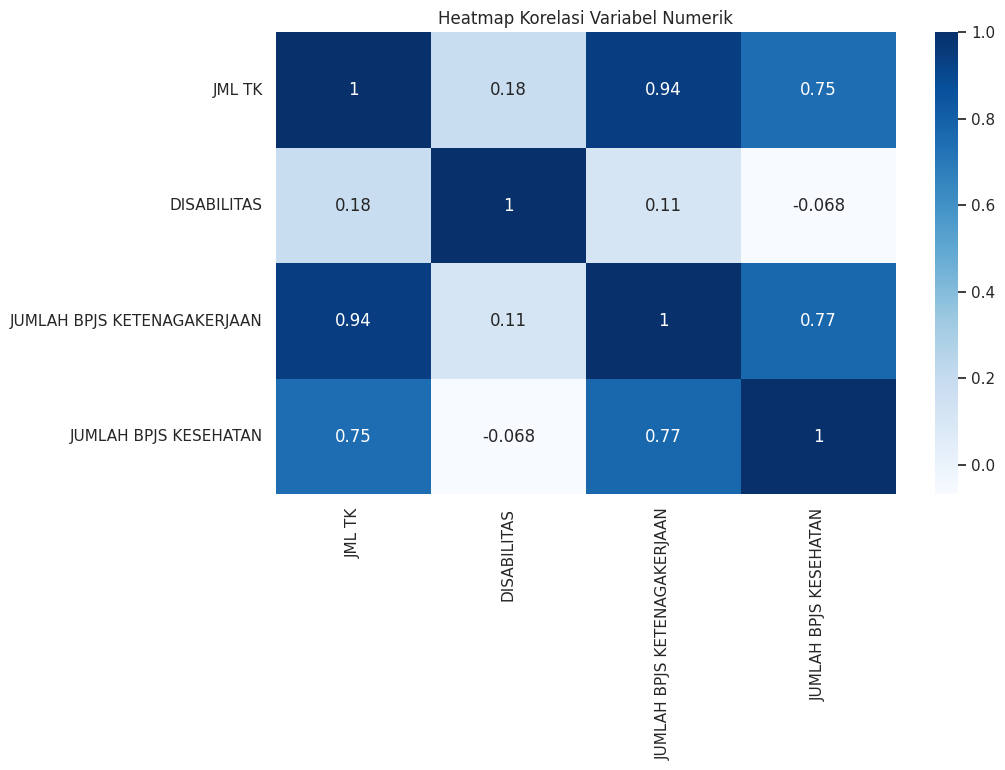

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

# DATA TRANSFORMATION


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# KOLOM PERSENTASE BPJS

In [ ]:
df['PersentaseBPJS'] = (df['JUMLAH BPJS KETENAGAKERJAAN'] / df['JML TK']) * 100

print("===== Data dengan kolom PersentaseBPJS =====")
display(df.head(10))

===== Data dengan kolom PersentaseBPJS =====


,KODE WILAYAH,PERUSAHAAN,SEKTOR,JML TK,ALAMAT,MAPS,DISABILITAS,JUMLAH BPJS KETENAGAKERJAAN,JUMLAH BPJS KESEHATAN,PP/PKB,LKS BIPARTIT,PersentaseBPJS
0,35.18.16,"PT. Mahatma Agro, Rejoso",Perdagangan Pupuk Pertanian,83,"Jl. Tamanan No 1, Sidokare, Kec. Rejoso, Kabup...","https://www.google.com/maps/dir//Sidokare,+Kec...",0,73,0,√,√,87.951807
1,35.18.10,PT. Indoprima Gemilang Plant 1,Industri Kabel,804,"Jl. Panglima Sudirman, Plimping, Gebangkerep, ...","https://www.google.com/maps/dir/-7.6111328,111...",2,781,0,√,√,97.139303
2,35.18.11,"PT. Sumber Alfaria Trijaya, Tbk",Retail,293,"Jl. Jenderal Ahmad Yani, RT 001/01, Warujayeng...","https://www.google.com/maps/dir/-7.6111328,111...",0,293,0,√,√,100.000000
3,35.18.14,"PT. Agro Bumi Timur, Bagor",Perdagangan Pupuk Pertanian,64,"Jl. Diponegoro No. 63, Ds. Banarankulon \nKec....",https://www.google.com/maps/place/CV.+Andhini+...,0,48,0,√,√,75.000000
4,35.18.14,"PT. Kharisma Baru Indonesia, Bagor",Industri Sepatu,409,"Jl. Guyangan 88, Kerepkidul, Bagor, Nganjuk, J...",https://www.google.com/maps/search/PT.+Kharism...,2,409,5,√,√,100.000000
5,35.18.14,"PT. Tirta Sukses Perkasa, Sukomoro",Industri Minuman Kemasan,156,"Jl. Panglima Sudirman No.6, Pehserut, Kec. Suk...",https://www.google.com/maps/place/PT.+Tirta+Su...,4,156,0,√,√,100.000000
6,35.18.14,"PT. Lotus Indah Textile Industries, Sukomoro",Industri Benang,1113,"Jl. Raya Nganjuk, Kedungsuko, Kertosono, Kec. ...",https://www.google.com/maps/place/PT.+Lotus+In...,3,1067,0,√,√,95.867026
7,35.18.14,"PT. Langgeng Jaya Makmur, Bagor",jasa transportasi dan logistik,816,"Jl. Dipoyono No.14, Guyangan, Kec. Bagor, Kab....",https://www.google.com/maps/place/PT+Langgeng+...,2,812,0,√,√,99.509804
8,35.18.11,PT. Cipta Karya Mansurin,Jasa Outsourcing,51,"Jalan Ahmad Yani ruko Kav 5, Warujayeng, Kec. ...",https://www.google.com/maps/place/Pt.+Cipta+ka...,0,46,0,√,√,90.196078
9,35.18.13,PR. Mangga Gandeng,Industri Rokok,346,"Jl. Ahmad Yani No.153, Payaman, Kec. Nganjuk, ...",https://www.google.com/maps/place/PR.+MANGGA+G...,0,40,7,√,√,11.560694


# PENGELOMPOKAN DATA

In [ ]:
bins = [0, 10, 20, 40, 60, 80, 100, 1000]
labels = [
    "0–10%",
    "10–20%",
    "20–40%",
    "40–60%",
    "60–80%",
    "80–100%",
    ">100%"
]

df['Kelompok'] = pd.cut(df['PersentaseBPJS'], bins=bins, labels=labels, right=True)


In [ ]:
kelompok_perusahaan = df.groupby('Kelompok')['PERUSAHAAN'].apply(list)

print(kelompok_perusahaan)

Kelompok
0–10%             [CV. Rio Karya Wood, PR. Putra Masa Depan]
10–20%                                  [PR. Mangga Gandeng]
20–40%     [PT. Gunawan Fajar, lengkong, PT. Kapasari, PT...
40–60%     [CV. Cahaya Gemilang Indah Loceret, PR. Cengki...
60–80%     [PT. Agro Bumi Timur, Bagor, PT. Kerta Rajasa ...
80–100%    [PT. Mahatma Agro, Rejoso, PT. Indoprima Gemil...
>100%                                                     []
Name: PERUSAHAAN, dtype: object


/tmp/ipython-input-2948747953.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kelompok_perusahaan = df.groupby('Kelompok')['PERUSAHAAN'].apply(list)


#MENAMPILKAN 1 KELOMPOK 0%-20%

In [ ]:
df[df['Kelompok'] == "0–10%"][['PERUSAHAAN', 'PersentaseBPJS']]

,PERUSAHAAN,PersentaseBPJS
18,CV. Rio Karya Wood,6.172840
42,PR. Putra Masa Depan,2.666667


#MENAMPILKAN 1 KELOMPOK 10%-20%


In [ ]:
df[df['Kelompok'] == "10–20%"][['PERUSAHAAN', 'PersentaseBPJS']]

,PERUSAHAAN,PersentaseBPJS
9,PR. Mangga Gandeng,11.560694


#MENAMPILKAN 1 KELOMPOK 20%-40%

In [ ]:
df[df['Kelompok'] == "20–40%"][['PERUSAHAAN', 'PersentaseBPJS']]

,PERUSAHAAN,PersentaseBPJS
14,"PT. Gunawan Fajar, lengkong",34.782609
16,PT. Kapasari,22.068966
22,"PT. Zhanhui Jaya Indonesia, Bagor",32.374101


#MENAMPILKAN 1 KELOMPOK 40%-60%

In [ ]:
df[df['Kelompok'] == "40–60%"][['PERUSAHAAN', 'PersentaseBPJS']]

,PERUSAHAAN,PersentaseBPJS
19,CV. Cahaya Gemilang Indah Loceret,50.000000
23,PR. Cengkir Gading,50.000000
35,RS Aisyiah,56.331878
40,PT. Arja Kayu Lapis,43.877551


#MENAMPILKAN 1 KELOMPOK 60%-80%

In [ ]:
df[df['Kelompok'] == "60–80%"][['PERUSAHAAN', 'PersentaseBPJS']]

,PERUSAHAAN,PersentaseBPJS
3,"PT. Agro Bumi Timur, Bagor",75.000000
29,PT. Kerta Rajasa Raya,79.777778


#MENAMPILKAN 1 KELOMPOK 80%-100%

In [ ]:
df[df['Kelompok'] == "80–100%"][['PERUSAHAAN', 'PersentaseBPJS']]

,PERUSAHAAN,PersentaseBPJS
0,"PT. Mahatma Agro, Rejoso",87.951807
1,PT. Indoprima Gemilang Plant 1,97.139303
2,"PT. Sumber Alfaria Trijaya, Tbk",100.000000
4,"PT. Kharisma Baru Indonesia, Bagor",100.000000
5,"PT. Tirta Sukses Perkasa, Sukomoro",100.000000
6,"PT. Lotus Indah Textile Industries, Sukomoro",95.867026
7,"PT. Langgeng Jaya Makmur, Bagor",99.509804
8,PT. Cipta Karya Mansurin,90.196078
10,PT. Sinergi Gula Nusantara,100.000000
11,"PT. BRI (Persero), Tbk",96.407186


# SCALING

In [ ]:
feature_cols = ['JUMLAH BPJS KETENAGAKERJAAN', 'JML TK']
X = df[feature_cols]
y = df['PersentaseBPJS']

# Lakukan scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n===== Data setelah scaling (fitur X) =====")
print(X_scaled[:10])


===== Data setelah scaling (fitur X) =====
[[-0.31259614 -0.44392455]
 [ 0.73959587  0.61801838]
 [ 0.01435618 -0.13462078]
 [-0.34974981 -0.47190917]
 [ 0.18674922  0.03623273]
 [-0.18924595 -0.33640467]
 [ 1.16463389  1.07313678]
 [ 0.78566642  0.63569288]
 [-0.35272211 -0.49105655]
 [-0.36163899 -0.0565584 ]]


MENGUBAH X_scaled MENJADI DATAFRAME

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

print("\n===== DataFrame fitur setelah Scaling =====")
display(X_scaled_df.head(10))


===== DataFrame fitur setelah Scaling =====


,JUMLAH BPJS KETENAGAKERJAAN,JML TK
0,-0.312596,-0.443925
1,0.739596,0.618018
2,0.014356,-0.134621
3,-0.349750,-0.471909
4,0.186749,0.036233
5,-0.189246,-0.336405
6,1.164634,1.073137
7,0.785666,0.635693
8,-0.352722,-0.491057
9,-0.361639,-0.056558


# VISUALISASI EDA


In [ ]:
import pandas as pd

# Pilih kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Statistik deskriptif lengkap
statistik = df[num_cols].describe().T

# Tambahkan median
statistik['median'] = df[num_cols].median()

# Pilih kolom penting
statistik = statistik[['min', 'max', 'mean', 'median', 'std']]

print("Statistik Deskriptif Variabel Numerik:")
display(statistik)

Statistik Deskriptif Variabel Numerik:


,min,max,mean,median,std
JML TK,47.0,4615.0,384.400000,178.500000,685.837221
DISABILITAS,0.0,4.0,0.480000,0.000000,1.034901
JUMLAH BPJS KETENAGAKERJAAN,0.0,4615.0,283.340000,72.000000,679.712443
JUMLAH BPJS KESEHATAN,0.0,19.0,0.980000,0.000000,3.040475
PersentaseBPJS,0.0,100.0,61.826757,87.396956,42.857725


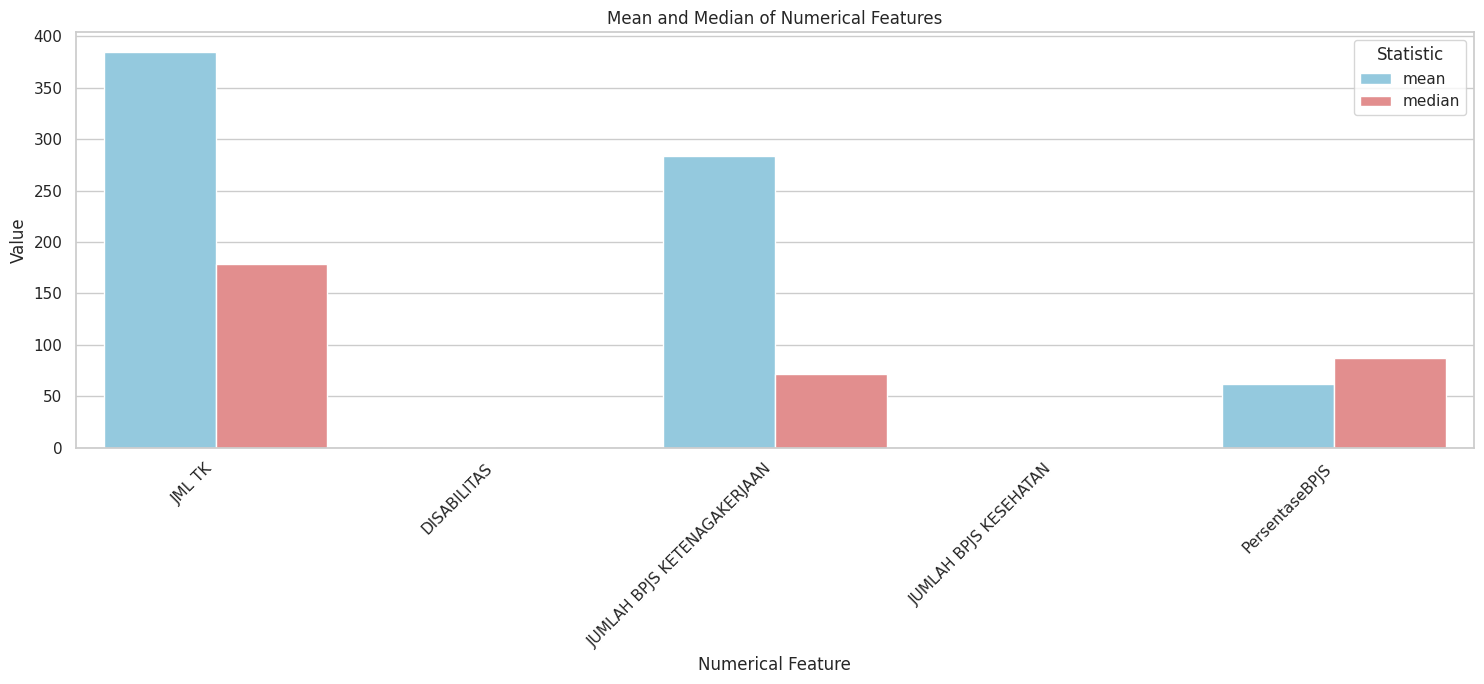

In [ ]:
plt.figure(figsize=(15, 7))

# Create a melted DataFrame for easier plotting of mean and median
statistik_melted = statistik[['mean', 'median']].reset_index().melt(id_vars='index', var_name='Statistic', value_name='Value')

sns.barplot(x='index', y='Value', hue='Statistic', data=statistik_melted, palette={'mean': 'skyblue', 'median': 'lightcoral'})
plt.title('Mean and Median of Numerical Features')
plt.xlabel('Numerical Feature')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

# Boxplot (Perbandingan & Outlier)

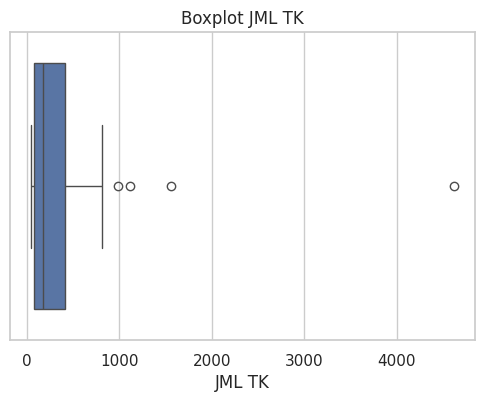

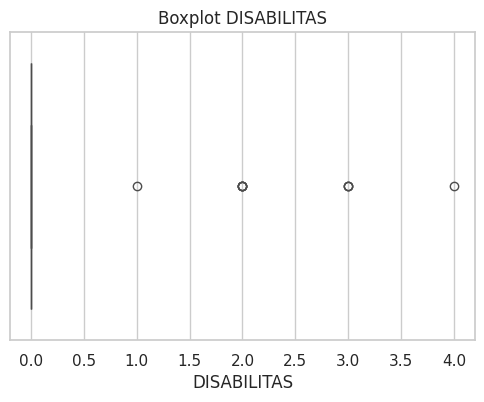

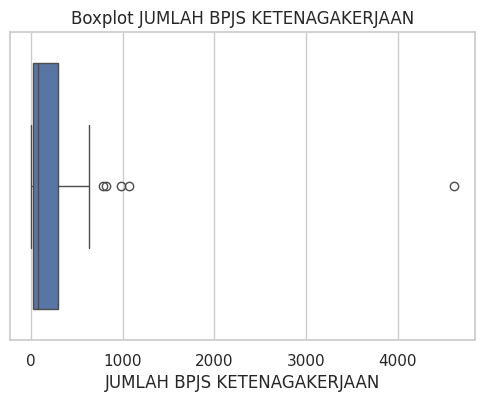

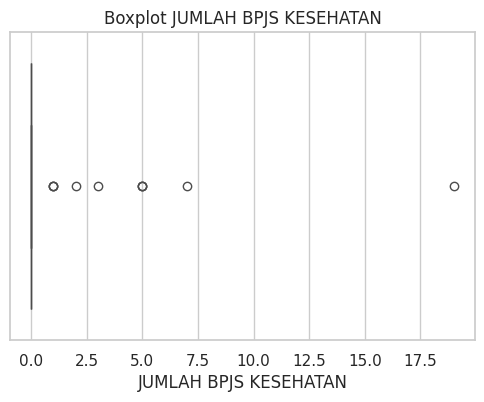

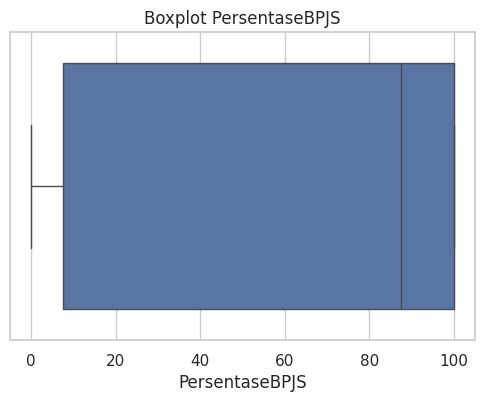

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()

#Data Splitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Contoh: pilih fitur numerik saja dulu (yang sudah siap)
X = df[['JML TK','JUMLAH BPJS KETENAGAKERJAAN']]   # sesuaikan nama kolom
y = df['JUMLAH BPJS KESEHATAN']                    # contoh target

# Split 80% train — 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print("Total data :", len(df))
print("Data latih :", len(X_train))
print("Data uji   :", len(X_test))


Total data : 50
Data latih : 40
Data uji   : 10


# MODELING


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df['persentase_bpjs'] = (df['JUMLAH BPJS KETENAGAKERJAAN'] / df['JML TK']) * 100


In [ ]:
df['kepatuhan'] = np.where(df['persentase_bpjs'] >= 80, 1, 0)


In [ ]:
X = df[['JML TK','JUMLAH BPJS KETENAGAKERJAAN','persentase_bpjs']]
y = df['kepatuhan']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)


In [ ]:
svm_model = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svm_model.fit(X_train, y_train)


SVC(C=1, class_weight='balanced', probability=True, random_state=42)

In [ ]:
y_pred = svm_model.predict(X_test)

print("Akurasi :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Akurasi : 0.9

Classification Report:

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10


Confusion Matrix:

[[3 0]
 [1 6]]


#Linear Kernel

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- Contoh Data ---
data = {
    "jumlah_tk": [10, 50, 30, 5, 100, 80, 7, 60],
    "jumlah_bpjs": [8, 45, 20, 2, 95, 60, 3, 55],
    "kepatuhan": [1,1,0,0,1,1,0,1]   # 1 = patuh, 0 = tidak patuh
}
df = pd.DataFrame(data)

# --- Fitur & Label ---
X = df[["jumlah_tk", "jumlah_bpjs"]]
y = df["kepatuhan"]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Model SVM Linear ---
svm_model = SVC(
    kernel="linear",
    C=1,
    class_weight="balanced",
    random_state=42
)

# --- Training ---
svm_model.fit(X_train, y_train)

# --- Prediksi ---
y_pred = svm_model.predict(X_test)

# --- Hitung Akurasi ---
akurasi = accuracy_score(y_test, y_pred) * 100

# --- Tampilkan Hasil ---
print(f"Akurasi SVM (Kernel Linear) adalah: {akurasi:.2f}%\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi SVM (Kernel Linear) adalah: 100.00%

Confusion Matrix:
 [[2]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# Polynomial Kernel

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- Contoh Data ---
data = {
    "jumlah_tk": [10, 50, 30, 5, 100, 80, 7, 60],
    "jumlah_bpjs": [8, 45, 20, 2, 95, 60, 3, 55],
    "kepatuhan": [1,1,0,0,1,1,0,1]   # 1 = patuh, 0 = tidak patuh
}
df = pd.DataFrame(data)

# --- Fitur & Label ---
X = df[["jumlah_tk", "jumlah_bpjs"]]
y = df["kepatuhan"]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Model SVM Polynomial Kernel ---
svm_poly = SVC(
    kernel="poly",
    degree=3,            # derajat polynomial (bisa diubah: 2,3,4,...)
    C=1,
    gamma="scale",
    class_weight="balanced",
    random_state=42
)

# --- Training ---
svm_poly.fit(X_train, y_train)

# --- Prediksi ---
y_pred = svm_poly.predict(X_test)

# --- Hitung Akurasi ---
akurasi = accuracy_score(y_test, y_pred) * 100

# --- Tampilkan Hasil ---
print(f"Akurasi SVM (Polynomial Kernel) adalah: {akurasi:.2f}%\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi SVM (Polynomial Kernel) adalah: 100.00%

Confusion Matrix:
 [[2]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# linear Kernel

In [ ]:
# --- Import Library ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# --- Pastikan Dataframe ---
# contoh: df
# df = pd.read_csv("dataset_bpjs.csv")

# --- Tentukan Fitur & Label ---
X = df[['jumlah_tk', 'jumlah_bpjs']]   # variabel input
y = df['kepatuhan']                    # label (0/1)

# --- Split Data (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Buat Model SVM Linear Kernel ---
svm_linear = SVC(
    kernel='linear',
    C=1,
    gamma='scale',
    class_weight='balanced',
    random_state=42
)

# --- Training Model ---
svm_linear.fit(X_train, y_train)

# --- Prediksi ---
y_pred = svm_linear.predict(X_test)

# --- Evaluasi ---
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

akurasi = accuracy_score(y_test, y_pred) * 100
print(f"\nAkurasi SVM (Linear Kernel): {akurasi:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:

[[2]]

Akurasi SVM (Linear Kernel): 100.00%

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


#RBF

In [ ]:
# --- 1. Import Library ---
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# --- 2. Load Dataset (contoh: Iris) ---
iris = datasets.load_iris()
X = iris.data
y = iris.target
label_names = iris.target_names

# --- 3. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 4. Buat Model SVM RBF Kernel ---
svm_rbf = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    class_weight=None,
    random_state=42
)

# --- 5. Latih Model ---
svm_rbf.fit(X_train, y_train)

# --- 6. Prediksi ---
y_pred = svm_rbf.predict(X_test)

# --- 7. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm,
    index=[f"Actual {name}" for name in label_names],
    columns=[f"Predicted {name}" for name in label_names]
)

print("=== Confusion Matrix (RBF Kernel) ===")
print(cm_df)

# --- 8. Hitung Akurasi ---
accuracy = accuracy_score(y_test, y_pred)
print("\n=== Accuracy (RBF Kernel) ===")
print(f"{accuracy*100:.2f}%")

# --- 9. Kategori Akurasi ---
if accuracy >= 0.80:
    kategori = "Sangat Patuh"
elif accuracy >= 0.60:
    kategori = "Cukup Patuh"
elif accuracy >= 0.40:
    kategori = "Patuh"
elif accuracy >= 0.20:
    kategori = "Kurang Patuh"
else:
    kategori = "Tidak Patuh"

print("\n=== Kategori Kepatuhan ===")
print(kategori)


=== Confusion Matrix (RBF Kernel) ===
                   Predicted setosa  Predicted versicolor  Predicted virginica
Actual setosa                    10                     0                    0
Actual versicolor                 0                     9                    0
Actual virginica                  0                     0                   11

=== Accuracy (RBF Kernel) ===
100.00%

=== Kategori Kepatuhan ===
Sangat Patuh


#sigmoid

In [ ]:
# --- 1. Import Library ---
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# --- 2. Load Dataset (contoh: Iris dataset) ---
iris = datasets.load_iris()
X = iris.data
y = iris.target
label_names = iris.target_names

# --- 3. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 4. Buat Model SVM Sigmoid Kernel ---
svm_sigmoid = SVC(
    kernel='sigmoid',
    C=1,
    gamma='scale',
    class_weight=None,
    random_state=42
)

# --- 5. Latih Model ---
svm_sigmoid.fit(X_train, y_train)

# --- 6. Prediksi ---
y_pred = svm_sigmoid.predict(X_test)

# --- 7. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm,
    index=[f"Actual {name}" for name in label_names],
    columns=[f"Predicted {name}" for name in label_names]
)

print("=== Confusion Matrix (Sigmoid Kernel) ===")
print(cm_df)

# --- 8. Hitung Akurasi ---
accuracy = accuracy_score(y_test, y_pred)
print("\n=== Accuracy (Sigmoid Kernel) ===")
print(f"{accuracy*100:.2f}%")

# --- 9. Kategori Kepatuhan ---
if accuracy >= 0.80:
    kategori = "Sangat Patuh"
elif accuracy >= 0.60:
    kategori = "Cukup Patuh"
elif accuracy >= 0.40:
    kategori = "Patuh"
elif accuracy >= 0.20:
    kategori = "Kurang Patuh"
else:
    kategori = "Tidak Patuh"

print("\n=== Kategori Kepatuhan ===")
print(kategori)


=== Confusion Matrix (Sigmoid Kernel) ===
                   Predicted setosa  Predicted versicolor  Predicted virginica
Actual setosa                     0                    10                    0
Actual versicolor                 0                     9                    0
Actual virginica                  0                    11                    0

=== Accuracy (Sigmoid Kernel) ===
30.00%

=== Kategori Kepatuhan ===
Kurang Patuh


#EVALUASI